<a href="https://colab.research.google.com/github/lorenzotomada/Applied_Mathematics/blob/main/Code/AM_lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Direct methods for linear systems**
Now we will implement the $LU$ and Cholesky factorizations.

In [1]:
%matplotlib inline
%pylab inline
from numpy import *

Populating the interactive namespace from numpy and matplotlib


### Definitions of the objects which we will use:

Let us define the matrix $A$:

In [2]:
n = 25
h = 1/(n-1)
x = linspace(0,1,n)

a = -ones((n-1))
b = 2*ones((n))
A = (1/h**2)*(diag(a,-1)+diag(b)+diag(a,1))

Now we need to adjust first and last row of $A$ to match the boundary conditions.

In [3]:
A[0,:] = 0 # u_0 = 0
A[0,0] = 1

A[-1,:] = 0 # u_n = 0
A[-1,-1] = 1

Now the forcing term:

In [4]:
f = x*(1.-x)
f[0] = 0
f[-1] = 0

We compute the solution using _linalg.solve()_. We will later compare it and the one we get using our implementation of Gauss algorithm.

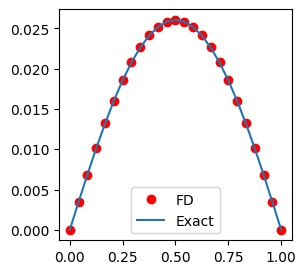

In [5]:
A1 = A.copy()
u = linalg.solve(A1, f)
u_ex = (x**4)/12. - (x**3)/6. + x/12.

# plot the FD and exact solution
figsize(3,3)
plot(x,u,'ro',label = 'FD')
plot(x,u_ex, label = 'Exact')
legend()

###Implementing the $LU$ factorization
If a pivot is null, we throw an error.

In [6]:
def LU(A):
    A = A.copy()
    N=len(A)
    for k in range(N-1):
        if (abs(A[k,k]) < 1e-15):
            raise RuntimeError("Null pivot")

        A[k+1:N,k] /= A[k,k]
        for j in range(k+1,N):
            A[k+1:N,j] -= A[k+1:N,k]*A[k,j]

    L=tril(A)
    for i in range(N):
        L[i,i]=1.0
    U = triu(A)
    return L, U

### Solving linear systems:

Solving linear systems in which the matrix is lower triangular by forward substitution:

In [7]:
def L_solve(L,rhs):
    x = zeros_like(rhs)
    N = len(L)

    x[0] = rhs[0]/L[0,0]
    for i in range(1,N):
        x[i] = (rhs[i] - dot(L[i, 0:i], x[0:i]))/L[i,i]

    return x

As before, but with $A$ upper triangular and using backward substitution:

In [8]:
def U_solve(U,rhs):
    x = zeros_like(rhs)
    N = len(U)

    x[-1] = rhs[-1]/U[-1,-1]
    for i in reversed(range(N-1)):
        x[i] = (rhs[i] - dot(U[i, i+1:N], x[i+1:N]))/U[i,i]

    return x

Now we will solve the system using $LU$ factorization:

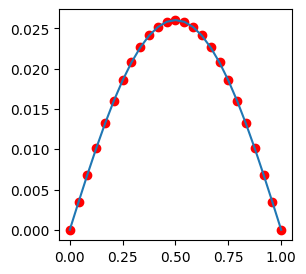

In [9]:
L, U = LU(A)
w = L_solve(L,f)
u = U_solve(U,w)

plot(x,u,'ro',label='Computed')
plot(x,u_ex,label='Exact')

### Implementing the Cholseky factorization.

In [10]:
def cholesky(A):
    A = A.copy()
    N = len(A)
    for k in range(N-1):
      A[k,k] = sqrt(A[k,k])
      A[k+1:N,k] = A[k+1:N,k]/A[k,k]

      for j in range(k+1,N):
        A[j:N,j] = A[j:N,j] - A[j:N,k]*A[j,k]

    A[-1,-1] = sqrt(A[-1,-1])
    L=tril(A)
    return L, L.transpose()

Now we modify $A$ in order to have it symmetric and positive definite. In this way, we can use Cholesky factorization.

It is worth underlying that these changes do not affect the final result, since we have homogeneous boundary data. It causes, however, a loss of generality, since our code can no longer be applied to the case of inhomogeneous boundary conditions.

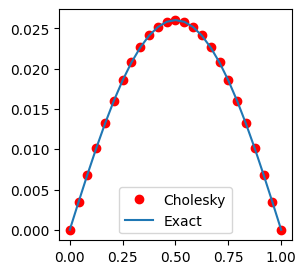

In [11]:
A[:,0] = 0
A[:,-1] = 0
A[0,0] = 1
A[-1,-1] = 1

HT, H = cholesky(A)
y = L_solve(HT,f)
u2 = U_solve(H,y)

plot(x,u,'ro', label='Cholesky')
plot(x,u_ex, label='Exact')
legend()

Now we use a different forcing term and we try to compute the solution $u$ without computing (again) the $LU$ factorization and we compare it with the exact solution (e.g. the one you get by the linsolve method).

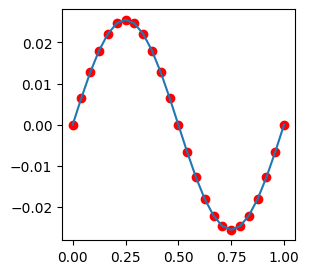

In [12]:
f = sin(2*pi*x)

w = L_solve(L,f)
u = U_solve(U,w)

u_ex = linalg.solve(A1, f)

plot(x,u,'ro',label='Computed')
plot(x,u_ex,label='Exact')